### <font color='red'> Project Part1: Buzz Prediction on Twitter - Explore Classification Algorithms

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

## Objective

-  To predict whether a specific topic in twitter creates a buzz (Binary Classification problem).
    - Sample the dataset using randomization and stratification.
    - Fit different classification algorithms on the sample data.
        - Select hyperparametrs for each classification algorithm using Grid Search CV.
    - Choose evaluation metric and select the best model based on train and test scores.
    - Run the entire dataset on the best model and predict the outcome.

## Package & Data Import

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
columns =['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6','AS(NA)_0','AS(NA)_1','AS(NA)_2','AS(NA)_3','AS(NA)_4','AS(NA)_5','AS(NA)_6','BL_0','BL_1','BL_2','BL_3','BL_4','BL_5','BL_6','NAC_0','NAC_1','NAC_2','NAC_3','NAC_4','NAC_5','NAC_6','AS(NAC)_0','AS(NAC)_1','AS(NAC)_2','AS(NAC)_3','AS(NAC)_4','AS(NAC)_5','AS(NAC)_6','CS_0','CS_1','CS_2','CS_3','CS_4','CS_5','CS_6','AT_0','AT_1','AT_2','AT_3','AT_4','AT_5','AT_6','NA_0','NA_1','NA_2','NA_3','NA_4','NA_5','NA_6','ADL_0','ADL_1','ADL_2','ADL_3','ADL_4','ADL_5','ADL_6','NAD_0','NAD_1','NAD_2','NAD_3','NAD_4','NAD_5','NAD_6','Annotation']

In [3]:
df_class = pd.read_csv('Twitter-Absolute-Sigma-500.data',header=None,names=columns,index_col=False)

In [4]:
X = df_class.iloc[:,:-1]
y = df_class['Annotation']

## Exploratory Data Analysis

#### _Check for Missing Data_

In [5]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140707 entries, 0 to 140706
Data columns (total 78 columns):
NCD_0         140707 non-null int64
NCD_1         140707 non-null int64
NCD_2         140707 non-null int64
NCD_3         140707 non-null int64
NCD_4         140707 non-null int64
NCD_5         140707 non-null int64
NCD_6         140707 non-null int64
AI_0          140707 non-null int64
AI_1          140707 non-null int64
AI_2          140707 non-null int64
AI_3          140707 non-null int64
AI_4          140707 non-null int64
AI_5          140707 non-null int64
AI_6          140707 non-null int64
AS(NA)_0      140707 non-null float64
AS(NA)_1      140707 non-null float64
AS(NA)_2      140707 non-null float64
AS(NA)_3      140707 non-null float64
AS(NA)_4      140707 non-null float64
AS(NA)_5      140707 non-null float64
AS(NA)_6      140707 non-null float64
BL_0          140707 non-null float64
BL_1          140707 non-null float64
BL_2          140707 non-null float64
BL_3 

In [6]:
df_class.isnull().values.any()

False

_It can be observed that there are no missing values in the dataset._

#### _Dataset Summary_

In [7]:
df_class.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Annotation
count,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,...,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000,140707.000000
mean,172.279823,155.150625,165.464476,176.820549,186.937700,216.209208,243.866510,87.050154,78.639236,84.269574,...,1.113444,1.196131,172.838807,155.630878,165.938674,177.314810,187.463794,216.776294,244.479194,0.197396
std,509.872276,471.573236,495.360236,528.351277,560.331281,632.188378,707.402192,234.731748,218.448179,233.536510,...,1.374287,1.826150,510.937549,472.462733,496.233557,529.286514,561.309487,633.203935,708.436795,0.398035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,6.000000,0.000000
50%,22.000000,19.000000,20.000000,22.000000,23.000000,28.000000,33.000000,13.000000,11.000000,13.000000,...,1.000000,1.000000,22.000000,19.000000,21.000000,22.000000,23.000000,28.000000,33.000000,0.000000
75%,125.000000,112.000000,119.000000,126.000000,133.000000,161.000000,186.000000,70.000000,64.000000,67.000000,...,1.100000,1.119048,126.000000,113.000000,119.000000,127.000000,134.000000,162.000000,187.000000,0.000000
max,24210.000000,22899.000000,20495.000000,27007.000000,30957.000000,28603.000000,37505.000000,15105.000000,15730.000000,16389.000000,...,185.666672,295.000000,24301.000000,22980.000000,20495.000000,27071.000000,31028.000000,28697.000000,37505.000000,1.000000


#### _Visualizations_

#### 1. Buzz Feed Distribution Across The Dataset

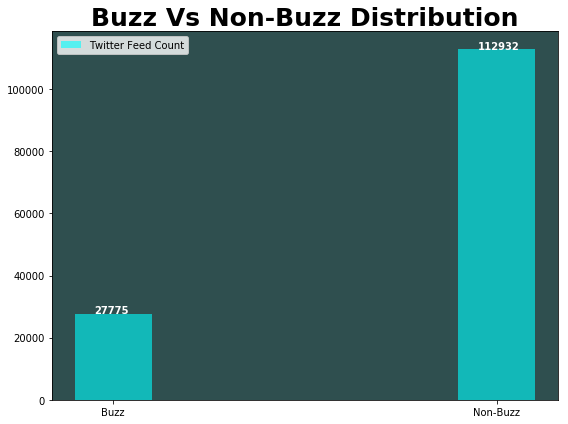

In [8]:
df_class['BuzzFlag'] = ['Non-Buzz' if val ==0 else ('Buzz') for val in df_class['Annotation']]
df_summ = df_class['BuzzFlag'].value_counts().sort_values(ascending=True)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,facecolor='darkslategray')
index = df_summ.index.unique()
y_pos = np.arange(len(index))
bar_width=0.2
opacity=0.6
plt.bar(y_pos,df_summ.values,bar_width,alpha=opacity,color='cyan',label='Twitter Feed Count')
for i,j in zip(y_pos,df_summ.values):
    ax.annotate(str(j),xy=(i-0.05,j),color='white',weight='bold')
plt.title("Buzz Vs Non-Buzz Distribution",fontsize=25,weight='bold')
plt.xticks(y_pos,index)
plt.tight_layout()
plt.legend()
plt.show()

_Distribution is not uniform among the classes. The dataset is majorly composed of the Non-Buzz class. Hence, the dataset is imbalanced._ 

#### 2. Average Author Increase across dataset

In [9]:
def summ_data(df,start):
    cols = [col for col in df if col.startswith(start)]
    a = start+'_median'
    df[a]=df[cols].median(axis=1)
    b = start+'_mean'
    df[b]=df[cols].mean(axis=1)
    c = start+'_std'
    df[c]=df[cols].std(axis=1)
col=['NCD','AI','AS(NA)','BL','NAC','AS(NAC)','CS','AT','NA','ADL','NAD','Annotation']
df_viz = pd.DataFrame()
for i in range(0,len(col)):
    summ_data(df_class,col[i])

In [10]:
df_AI_median = pd.DataFrame(df_class[['AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6']].median().reset_index()).rename(columns={"index":"AI",0:"Median_increase"})
df_AI_mean = pd.DataFrame(df_class[['AI_0','AI_1','AI_2','AI_3','AI_4','AI_5','AI_6']].mean().reset_index()).rename(columns={"index":"AI",0:"Mean_increase"})

In [11]:
def drawLineChart(df1,df2,title):
    n = len(df1)
    xaxis = df1.AI.unique()
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111,facecolor='darkslategray')
    ax.plot(df1.iloc[:,0],df_AI_median.iloc[:,1], color='cyan',linewidth=2,alpha=0.7)
    ax.plot(df2.iloc[:,0],df_AI_mean.iloc[:,1], color='lightgreen',linewidth=2,alpha=0.7)
    ax.set_title(title,fontsize=20,weight='bold')
    for i,j in zip(df1.iloc[:,0],df1.iloc[:,1]):
        ax.annotate(str(j),xy=(i,j),color='white',weight='bold')
    for i,j in zip(df2.iloc[:,0],round(df2.iloc[:,1],2)):
        ax.annotate(str(j),xy=(i,j),color='white',weight='bold')
    ax.set_xlabel('Author Increase At Different Time Periods (t0-t6)', fontsize=10,weight='bold')
    ax.set_ylabel('Number of People',fontsize=10,weight='bold')
    handles,labels= ax.get_legend_handles_labels()
    ax.legend(handles,labels)
    plt.show()

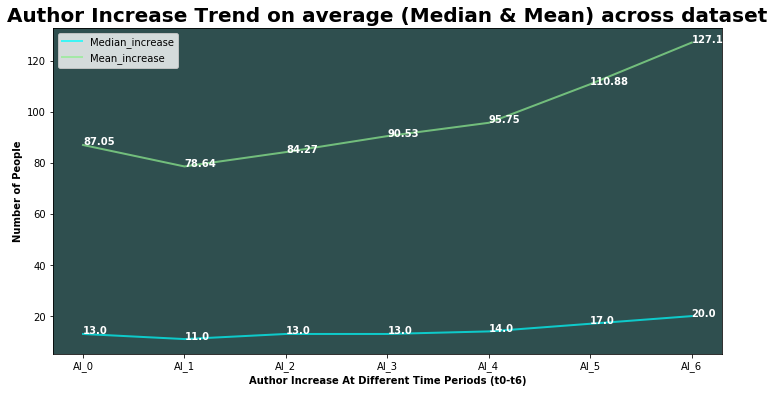

In [12]:
drawLineChart(df_AI_median,df_AI_mean,'Author Increase Trend on average (Median & Mean) across dataset')

_From the plot, we can infer that the increase in number of new authors over time follows an increasing trend.Indicating that most of the tweets in the dataset has gained popularity over the time period measured_ 

#### 3. Skewness of the Independent Variables

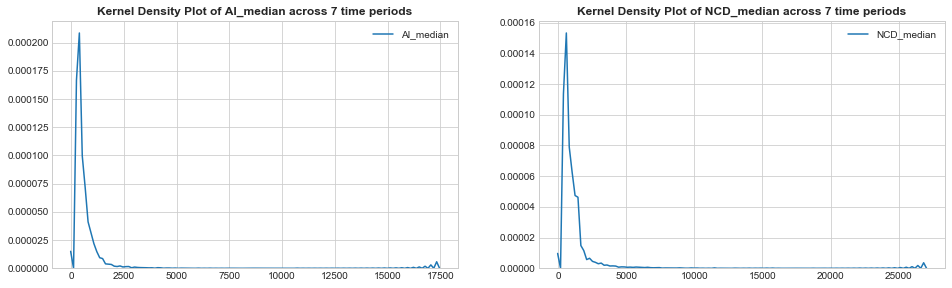

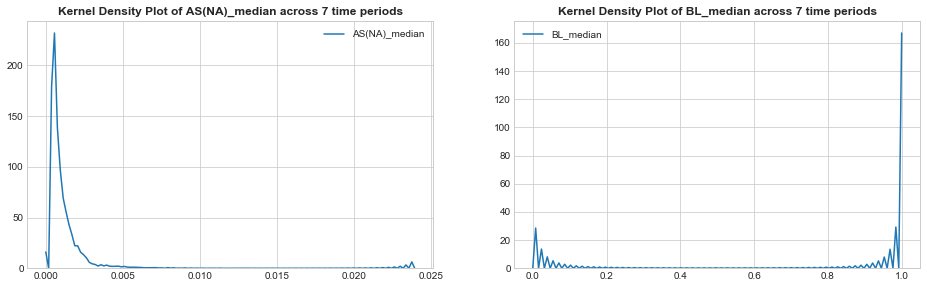

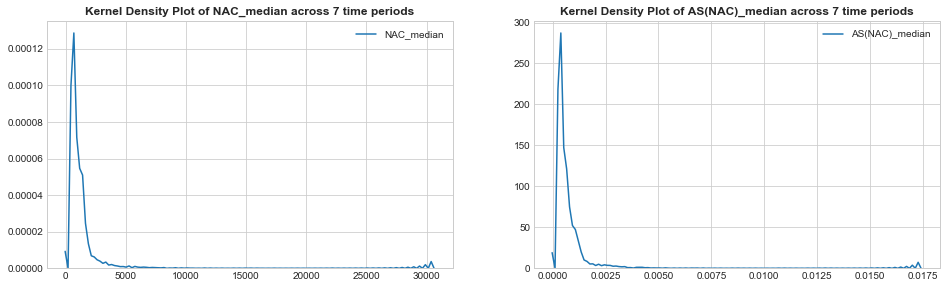

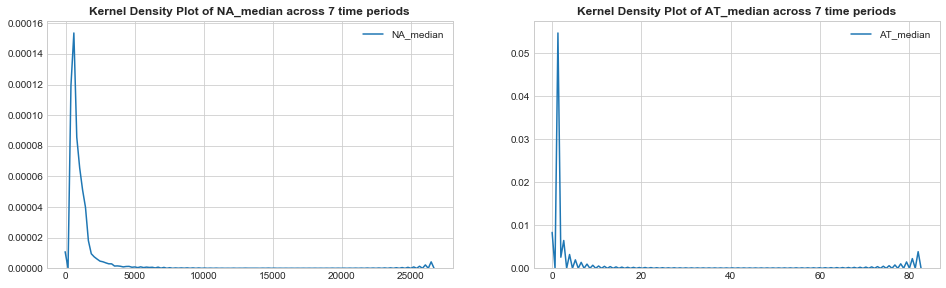

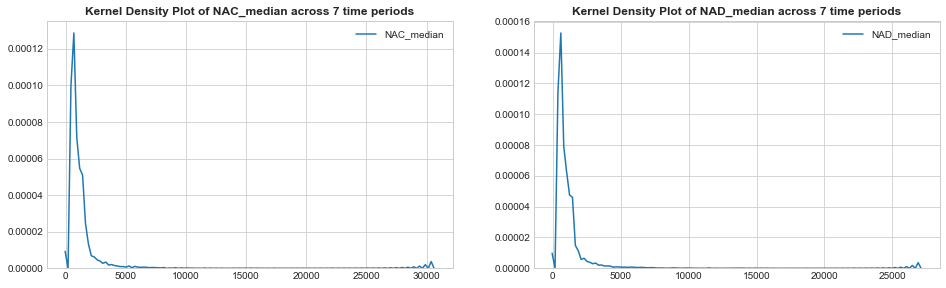

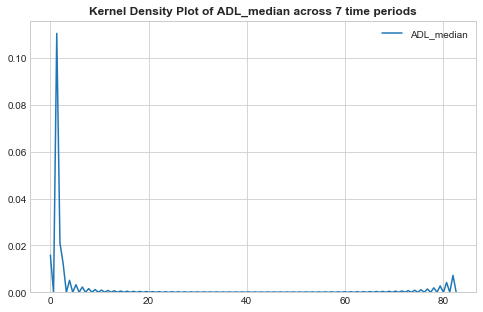

In [13]:
import seaborn as sns
def kde_plot_medians(df,col1,col2):
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(16,10))
    plt.subplot(221)
    sns.kdeplot(df[col1])
    plt.title('Kernel Density Plot of ' + col1 +' across 7 time periods',fontsize=12,weight='bold')
    plt.grid(True)
    plt.subplot(222)
    sns.kdeplot(df[col2])
    plt.title('Kernel Density Plot of ' + col2 + ' across 7 time periods',fontsize=12,weight='bold')
    plt.grid(True)
    plt.show()
kde_plot_medians(df_class,'AI_median', 'NCD_median')
kde_plot_medians(df_class,'AS(NA)_median', 'BL_median')
kde_plot_medians(df_class,'NAC_median', 'AS(NAC)_median')
kde_plot_medians(df_class,'NA_median', 'AT_median')
kde_plot_medians(df_class,'NAC_median', 'NAD_median')
sns.set_style("whitegrid")
fig = plt.figure(figsize=(8,5))
sns.kdeplot(df_class['ADL_median'])
plt.title('Kernel Density Plot of ADL_median across 7 time periods',fontsize=12,weight='bold')
plt.grid(True)
plt.show()

_All the features are of different scale and most of them are right skewed._

## Evaluation Strategy

**ROC_AUC_score** - ROC curve plots true positive rate versus false positive rate for all classification thresholds ranging from 0 to 1. Imbalanced dataset doesn't change the way in which the ROC curve is generated. To quantify the performance of the classifier, area under the  ROC curve is computed. AUC metric computes the probability that a classifier will rank randomly chosen positive observation higher than randomly chosen negative observation and thus serves as a good evaluation metric for imbalanced dataset.

In [14]:
from sklearn.metrics import roc_auc_score

#### _Data Sampling_

_Taking 10% of the data from entire dataset using randomization and stratification techniques._

In [15]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1, random_state = 10)

In [16]:
sample_target.value_counts()

0.0    11350
1.0     2721
Name: Annotation, dtype: int64

#### _Train-Test Split_

_Splitting the sample dataset into train set (80%) and test set (20%)_

In [17]:
X_train_S, X_test_S, y_train, y_test = train_test_split(sample_data, sample_target, test_size=0.2, random_state = 10)

#### _Scaling_

_Applying MinMaxScaler() on train and test sets to scale the column values between 0 and 1. MinMaxScaler() reduces skewness but doesn't remove it. Since the column values are in the range of 0 to 1, the results will be consistent._

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_S)
X_test = scaler.transform(X_test_S)

#### _Grid Search - Method for plotting the Train & Test Scores_

In [19]:
def grid_train_test_plot(df,col,train,test,title,xlabel,ylabel,width,height,flag):
    fig = plt.figure(figsize=(width,height))
    x=len(df[col])
    x_label=df[col].unique()
    ax = fig.add_subplot(111,facecolor='white')
    ax.plot(df[col], df[train], c = 'g', linewidth=2, alpha=0.7,label='Train ROC score')
    ax.plot(df[col], df[test], c = 'b',linewidth=2, alpha=0.7,label='Test ROC score')
    ax.scatter(df[col], df[train], c = 'g', alpha=0.7,label='Train ROC score')
    ax.scatter(df[col], df[test], c = 'b',alpha=0.7,label='Test ROC score')
    if(flag=='show'):
        for i,j in zip(df[col],round(df[train],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
        for i,j in zip(df[col],round(df[test],3)):
            ax.annotate(str(j),xy=(i,j),color='black')
    ax.legend()
    plt.grid(zorder=0)
    ax.set_title(title,fontsize=20,weight='bold')
    ax.set_xlabel(xlabel,fontsize=10,weight='bold')
    ax.set_ylabel(ylabel,fontsize=10,weight='bold')
    handles, labels = ax.get_legend_handles_labels()
    plt.show()

## K Neighbors Classifier

In [20]:
knn_param_grid = {'n_neighbors': list(np.arange(1,11))}

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
knn_grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(knn_grid_search.best_params_))
print("Best cross_val score : {}".format(knn_grid_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  2.0min remaining:   25.8s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  2.2min remaining:    8.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.3min finished


Best Parameters : {'n_neighbors': 10}
Best cross_val score : 0.9830327613149744


In [22]:
knnclassresults = pd.DataFrame(knn_grid_search.cv_results_)

Text(0,0.5,'Cross-Validated Accuracy')

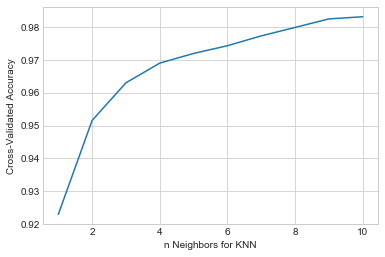

In [81]:
grid_mean_scores = [result.mean_validation_score for result in knn_grid_search.grid_scores_]
plt.plot(np.arange(1,11,1), grid_mean_scores)
plt.xlabel('n Neighbors for KNN')
plt.ylabel('Cross-Validated Accuracy')

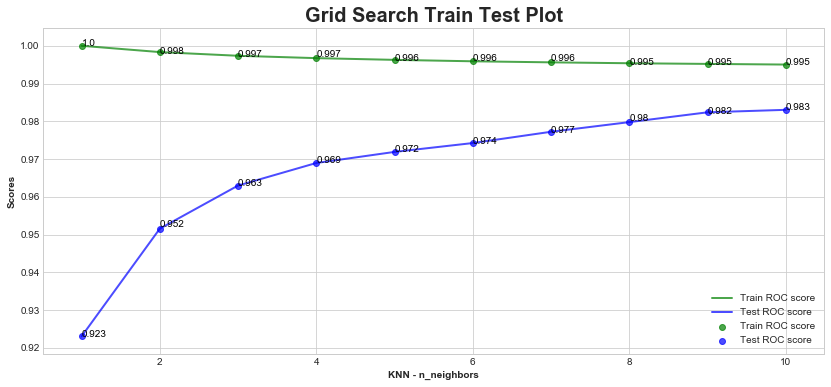

In [24]:
grid_train_test_plot(knnclassresults,'param_n_neighbors','mean_train_score','mean_test_score','Grid Search Train Test Plot','KNN - n_neighbors','Scores',14,6,'show')

In [25]:
knn_accuracy_train = knn_grid_search.best_estimator_.score(X_train, y_train)
knn_accuracy_test = knn_grid_search.best_estimator_.score(X_test, y_test)

print('K Neighbors Classifier - Train Accuracy: %.2f'%knn_accuracy_train)
print('K Neighbors Classifier - Test Accuracy: %.2f '%knn_accuracy_test)

K Neighbors Classifier - Train Accuracy: 0.97
K Neighbors Classifier - Test Accuracy: 0.96 


In [26]:
knn_auc_train = roc_auc_score(y_train,knn_grid_search.predict(X_train))
knn_auc_test = roc_auc_score(y_test,knn_grid_search.predict(X_test))

print('K Neighbors Classifier - Train roc_auc_score: %.2f'%knn_auc_train)
print('K Neighbors Classifier - Test roc_auc_score: %.2f '%knn_auc_test)

K Neighbors Classifier - Train roc_auc_score: 0.94
K Neighbors Classifier - Test roc_auc_score: 0.92 


In [27]:
report_table = [['K Neighbors Classifier', str(knn_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), knn_accuracy_train, knn_accuracy_test, knn_auc_train, knn_auc_test]]

 ## Logistic Regression Classifier

In [28]:
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l1','l2']}

In [29]:
from sklearn.linear_model import LogisticRegression

lr_grid_search = GridSearchCV(LogisticRegression(random_state = 10), lr_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
lr_grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(lr_grid_search.best_params_))
print("Best cross_val score : {}".format(lr_grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed:   35.9s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   44.8s finished


Best Parameters : {'C': 10, 'penalty': 'l1'}
Best cross_val score : 0.992596552768754


In [30]:
lrclassresults = pd.DataFrame(lr_grid_search.cv_results_)
lrclassresults['identifier_name'] = lrclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
lrclassresults['identifier'] = (lrclassresults.index)

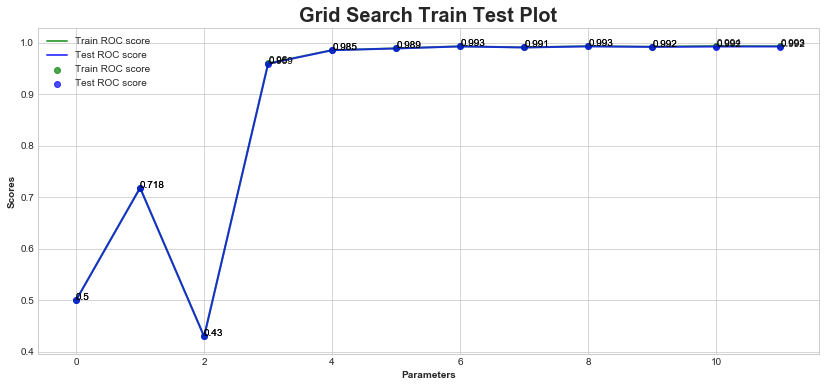

,0,1,2,3,4,5,6,7,8,9,10,11
identifier,0,1,2,3,4,5,6,7,8,9,10,11
identifier_name,"'C': 0.001, 'penalty': 'l1'","'C': 0.001, 'penalty': 'l2'","'C': 0.01, 'penalty': 'l1'","'C': 0.01, 'penalty': 'l2'","'C': 0.1, 'penalty': 'l1'","'C': 0.1, 'penalty': 'l2'","'C': 1, 'penalty': 'l1'","'C': 1, 'penalty': 'l2'","'C': 10, 'penalty': 'l1'","'C': 10, 'penalty': 'l2'","'C': 100, 'penalty': 'l1'","'C': 100, 'penalty': 'l2'"


In [31]:
grid_train_test_plot(lrclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'show')
lrclassresults[['identifier','identifier_name']].transpose()

In [32]:
lr_accuracy_train = lr_grid_search.best_estimator_.score(X_train, y_train)
lr_accuracy_test = lr_grid_search.best_estimator_.score(X_test, y_test)

print('Logistic Regression - Train Accuracy: %.2f'%lr_accuracy_train)
print('Logistic Regression - Test Accuracy: %.2f '%lr_accuracy_test)

Logistic Regression - Train Accuracy: 0.97
Logistic Regression - Test Accuracy: 0.97 


In [33]:
lr_auc_train = roc_auc_score(y_train,lr_grid_search.predict(X_train))
lr_auc_test = roc_auc_score(y_test,lr_grid_search.predict(X_test))

print('Logistic Regression - Train roc_auc_score: %.2f'%lr_auc_train)
print('Logistic Regression - Test roc_auc_score: %.2f '%lr_auc_test)

Logistic Regression - Train roc_auc_score: 0.94
Logistic Regression - Test roc_auc_score: 0.94 


In [34]:
report_table = report_table + [['Logistic Regression', str(lr_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), lr_accuracy_train, lr_accuracy_test, lr_auc_train, lr_auc_test]]

## Linear Support Vector Machine Classifier

In [35]:
linsvc_param_grid = [{'C':[0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l2'],'loss':['hinge','squared_hinge']},
                     {'C':[0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1'],'dual':[False],'loss':['squared_hinge']}]

In [36]:
from sklearn.svm import LinearSVC
linsvc_grid_search = GridSearchCV(LinearSVC(random_state = 10),linsvc_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
linsvc_grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(linsvc_grid_search.best_params_))
print("Best cross_val score : {}".format(linsvc_grid_search.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   53.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   58.1s finished


Best Parameters : {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Best cross_val score : 0.9926366251575703


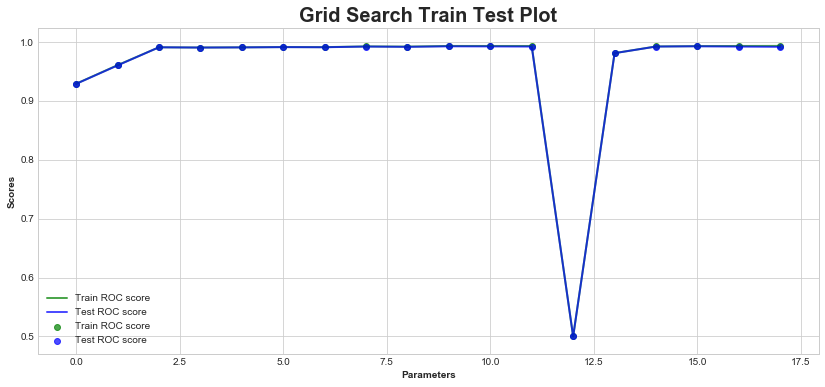

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
identifier,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
identifier_name,"'C': 0.001, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.001, 'loss': 'squared_hinge', 'penalty'...","'C': 0.01, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.01, 'loss': 'squared_hinge', 'penalty':...","'C': 0.1, 'loss': 'hinge', 'penalty': 'l2'","'C': 0.1, 'loss': 'squared_hinge', 'penalty': ...","'C': 1, 'loss': 'hinge', 'penalty': 'l2'","'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'","'C': 10, 'loss': 'hinge', 'penalty': 'l2'","'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'","'C': 100, 'loss': 'hinge', 'penalty': 'l2'","'C': 100, 'loss': 'squared_hinge', 'penalty': ...","'C': 0.001, 'dual': False, 'loss': 'squared_hi...","'C': 0.01, 'dual': False, 'loss': 'squared_hin...","'C': 0.1, 'dual': False, 'loss': 'squared_hing...","'C': 1, 'dual': False, 'loss': 'squared_hinge'...","'C': 10, 'dual': False, 'loss': 'squared_hinge...","'C': 100, 'dual': False, 'loss': 'squared_hing..."


In [37]:
linsvcclassresults = pd.DataFrame(linsvc_grid_search.cv_results_)
linsvcclassresults['identifier_name'] = linsvcclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
linsvcclassresults['identifier'] = (linsvcclassresults.index)
grid_train_test_plot(linsvcclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
linsvcclassresults[['identifier','identifier_name']].transpose()

In [38]:
lsvc_accuracy_train = linsvc_grid_search.best_estimator_.score(X_train, y_train)
lsvc_accuracy_test = linsvc_grid_search.best_estimator_.score(X_test, y_test)

print('Linear Support Vector Machine Classifier - Train Accuracy: %.2f'%lsvc_accuracy_train)
print('Linear Support Vector Machine Classifier - Test Accuracy: %.2f '%lsvc_accuracy_test)

Linear Support Vector Machine Classifier - Train Accuracy: 0.97
Linear Support Vector Machine Classifier - Test Accuracy: 0.97 


In [39]:
lsvc_auc_train = roc_auc_score(y_train,linsvc_grid_search.predict(X_train))
lsvc_auc_test = roc_auc_score(y_test,linsvc_grid_search.predict(X_test))

print('Linear Support Vector Machine Classifier - Train roc_auc_score: %.2f'%lsvc_auc_train)
print('Linear Support Vector Machine Classifier - Test roc_auc_score: %.2f '%lsvc_auc_test)

Linear Support Vector Machine Classifier - Train roc_auc_score: 0.93
Linear Support Vector Machine Classifier - Test roc_auc_score: 0.93 


In [40]:
report_table = report_table + [['Linear Support Vector Machine Classifier', str(linsvc_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), lsvc_accuracy_train, lsvc_accuracy_test, lsvc_auc_train, lsvc_auc_test]]

## Linear Kernelized Support Vector Machine Classifier

In [41]:
svm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [42]:
from sklearn.svm import SVC

svm_grid_search = GridSearchCV(SVC(kernel = 'linear', random_state = 10),svm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
svm_grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(svm_grid_search.best_params_))
print("Best cross_val score : {}".format(svm_grid_search.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  1.0min remaining:   35.8s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.0min remaining:   18.8s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  1.1min remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Best Parameters : {'C': 100}
Best cross_val score : 0.9921885148380426


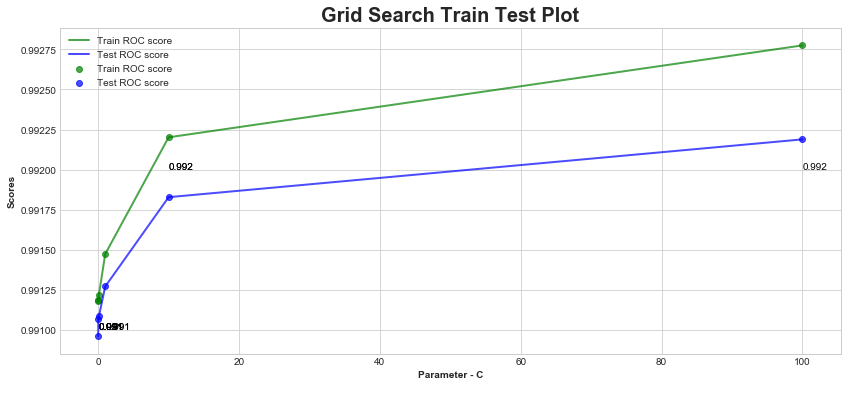

In [43]:
linsvmclassresults = pd.DataFrame(svm_grid_search.cv_results_)
grid_train_test_plot(linsvmclassresults,'param_C','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameter - C','Scores',14,6,'show')

In [44]:
svm_accuracy_train = svm_grid_search.best_estimator_.score(X_train, y_train)
svm_accuracy_test = svm_grid_search.best_estimator_.score(X_test, y_test)

print('Linear Kernelized Support Vector Machine Classifier - Train Accuracy: %.2f'%svm_accuracy_train)
print('Linear Kernelized Support Vector Machine Classifier - Test Accuracy: %.2f '%svm_accuracy_test)

Linear Kernelized Support Vector Machine Classifier - Train Accuracy: 0.97
Linear Kernelized Support Vector Machine Classifier - Test Accuracy: 0.97 


In [45]:
svm_auc_train = roc_auc_score(y_train,svm_grid_search.predict(X_train))
svm_auc_test = roc_auc_score(y_test,svm_grid_search.predict(X_test))

print('Linear Kernelized Support Vector Machine Classifier - Train roc_auc_score: %.2f'%svm_auc_train)
print('Linear Kernelized Support Vector Machine Classifier - Test roc_auc_score: %.2f '%svm_auc_test)

Linear Kernelized Support Vector Machine Classifier - Train roc_auc_score: 0.94
Linear Kernelized Support Vector Machine Classifier - Test roc_auc_score: 0.94 


In [46]:
report_table = report_table + [['Linear Kernelized Support Vector Machine Classifier', str(svm_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), svm_accuracy_train, svm_accuracy_test, svm_auc_train, svm_auc_test]]

## RBF Kernelized Support Vector Machine Classifier

In [47]:
rbfsvm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

In [48]:
rbfsvm_grid_search = GridSearchCV(SVC(kernel = 'rbf', random_state = 10),rbfsvm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
rbfsvm_grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(rbfsvm_grid_search.best_params_))
print("Best cross_val score : {}".format(rbfsvm_grid_search.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.9min finished


Best Parameters : {'C': 0.1, 'gamma': 0.01}
Best cross_val score : 0.991151840383564


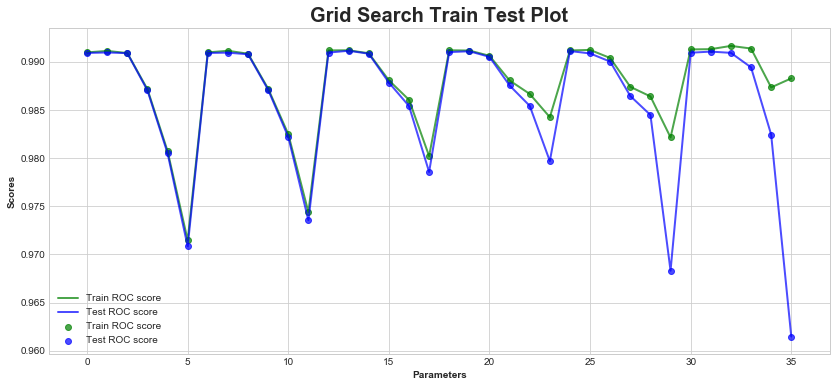

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
identifier,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
identifier_name,"'C': 0.001, 'gamma': 0.001","'C': 0.001, 'gamma': 0.01","'C': 0.001, 'gamma': 0.1","'C': 0.001, 'gamma': 1","'C': 0.001, 'gamma': 10","'C': 0.001, 'gamma': 100","'C': 0.01, 'gamma': 0.001","'C': 0.01, 'gamma': 0.01","'C': 0.01, 'gamma': 0.1","'C': 0.01, 'gamma': 1",...,"'C': 10, 'gamma': 0.1","'C': 10, 'gamma': 1","'C': 10, 'gamma': 10","'C': 10, 'gamma': 100","'C': 100, 'gamma': 0.001","'C': 100, 'gamma': 0.01","'C': 100, 'gamma': 0.1","'C': 100, 'gamma': 1","'C': 100, 'gamma': 10","'C': 100, 'gamma': 100"


In [49]:
rbfsvmclassresults = pd.DataFrame(rbfsvm_grid_search.cv_results_)
rbfsvmclassresults['identifier_name'] = rbfsvmclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
rbfsvmclassresults['identifier'] = (rbfsvmclassresults.index)
grid_train_test_plot(rbfsvmclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
rbfsvmclassresults[['identifier','identifier_name']].transpose()

In [50]:
rbfsvm_accuracy_train = rbfsvm_grid_search.best_estimator_.score(X_train, y_train)
rbfsvm_accuracy_test = rbfsvm_grid_search.best_estimator_.score(X_test, y_test)

print('RBF Kernelized Support Vector Machine Classifier - Train Accuracy: %.2f'%rbfsvm_accuracy_train)
print('RBF Kernelized Support Vector Machine Classifier - Test Accuracy: %.2f '%rbfsvm_accuracy_test)

RBF Kernelized Support Vector Machine Classifier - Train Accuracy: 0.81
RBF Kernelized Support Vector Machine Classifier - Test Accuracy: 0.81 


In [51]:
rbfsvm_auc_train = roc_auc_score(y_train,rbfsvm_grid_search.predict(X_train))
rbfsvm_auc_test = roc_auc_score(y_test,rbfsvm_grid_search.predict(X_test))

print('RBF Kernelized Support Vector Machine Classifier - Train roc_auc_score: %.2f'%rbfsvm_auc_train)
print('RBF Kernelized Support Vector Machine Classifier - Test roc_auc_score: %.2f '%rbfsvm_auc_test)

RBF Kernelized Support Vector Machine Classifier - Train roc_auc_score: 0.51
RBF Kernelized Support Vector Machine Classifier - Test roc_auc_score: 0.51 


In [52]:
report_table = report_table + [['RBF Kernelized Support Vector Machine Classifier', str(rbfsvm_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), rbfsvm_accuracy_train, rbfsvm_accuracy_test, rbfsvm_auc_train, rbfsvm_auc_test]]

## Poly Kernelized Support Vector Machine Classifier

In [53]:
psvm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1], 'degree' : [2, 3]}

In [54]:
psvm_grid_search = GridSearchCV(SVC(kernel = 'poly', random_state = 10),psvm_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
psvm_grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(psvm_grid_search.best_params_))
print("Best cross_val score : {}".format(psvm_grid_search.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  6.2min
[Paralle

Best Parameters : {'C': 10, 'degree': 2, 'gamma': 0.01}
Best cross_val score : 0.9910072879770002


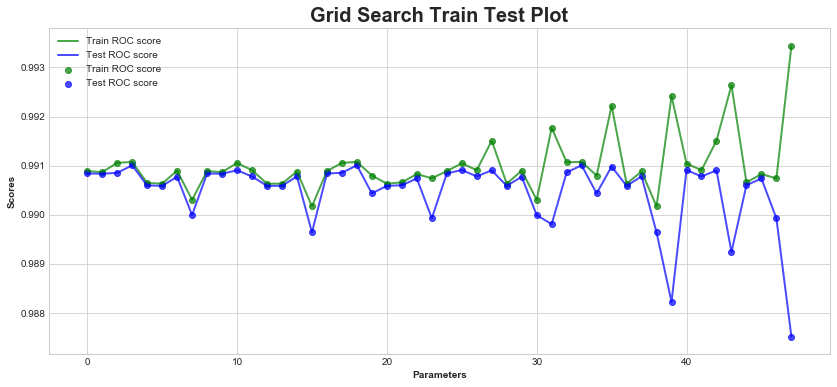

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
identifier,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
identifier_name,"'C': 0.001, 'degree': 2, 'gamma': 0.001","'C': 0.001, 'degree': 2, 'gamma': 0.01","'C': 0.001, 'degree': 2, 'gamma': 0.1","'C': 0.001, 'degree': 2, 'gamma': 1","'C': 0.001, 'degree': 3, 'gamma': 0.001","'C': 0.001, 'degree': 3, 'gamma': 0.01","'C': 0.001, 'degree': 3, 'gamma': 0.1","'C': 0.001, 'degree': 3, 'gamma': 1","'C': 0.01, 'degree': 2, 'gamma': 0.001","'C': 0.01, 'degree': 2, 'gamma': 0.01",...,"'C': 10, 'degree': 3, 'gamma': 0.1","'C': 10, 'degree': 3, 'gamma': 1","'C': 100, 'degree': 2, 'gamma': 0.001","'C': 100, 'degree': 2, 'gamma': 0.01","'C': 100, 'degree': 2, 'gamma': 0.1","'C': 100, 'degree': 2, 'gamma': 1","'C': 100, 'degree': 3, 'gamma': 0.001","'C': 100, 'degree': 3, 'gamma': 0.01","'C': 100, 'degree': 3, 'gamma': 0.1","'C': 100, 'degree': 3, 'gamma': 1"


In [55]:
polysvmclassresults = pd.DataFrame(psvm_grid_search.cv_results_)
polysvmclassresults['identifier_name'] = polysvmclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
polysvmclassresults['identifier'] = (polysvmclassresults.index)
grid_train_test_plot(polysvmclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
polysvmclassresults[['identifier','identifier_name']].transpose()

In [56]:
psvm_accuracy_train = psvm_grid_search.best_estimator_.score(X_train, y_train)
psvm_accuracy_test = psvm_grid_search.best_estimator_.score(X_test, y_test)

print('Poly Kernelized Support Vector Machine Classifier - Train Accuracy: %.2f'%psvm_accuracy_train)
print('Poly Kernelized Support Vector Machine Classifier - Test Accuracy: %.2f '%psvm_accuracy_test)

Poly Kernelized Support Vector Machine Classifier - Train Accuracy: 0.88
Poly Kernelized Support Vector Machine Classifier - Test Accuracy: 0.88 


In [57]:
psvm_auc_train = roc_auc_score(y_train,psvm_grid_search.predict(X_train))
psvm_auc_test = roc_auc_score(y_test,psvm_grid_search.predict(X_test))

print('Poly Kernelized Support Vector Machine Classifier - Train roc_auc_score: %.2f'%psvm_auc_train)
print('Poly Kernelized Support Vector Machine Classifier - Test roc_auc_score: %.2f '%psvm_auc_test)

Poly Kernelized Support Vector Machine Classifier - Train roc_auc_score: 0.70
Poly Kernelized Support Vector Machine Classifier - Test roc_auc_score: 0.69 


In [58]:
report_table = report_table + [['Poly Kernelized Support Vector Machine Classifier',str(psvm_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), psvm_accuracy_train, psvm_accuracy_test, psvm_auc_train, psvm_auc_test]]

## Decision Tree Classifier

In [59]:
dt_param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10],'max_features':[1,2,3,4,5,6,7,8,9,10]}

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt_grid_search= GridSearchCV( DecisionTreeClassifier(random_state = 10),dt_param_grid, cv=5, scoring='roc_auc', n_jobs = -1,verbose=10)
dt_grid_search.fit(X_train, y_train)
print("Best Parameters : {}".format(dt_grid_search.best_params_))
print("Best cross_val score : {}".format(dt_grid_search.best_score_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   21.6s
[Paralle

Best Parameters : {'max_depth': 5, 'max_features': 7}
Best cross_val score : 0.9858047715064767


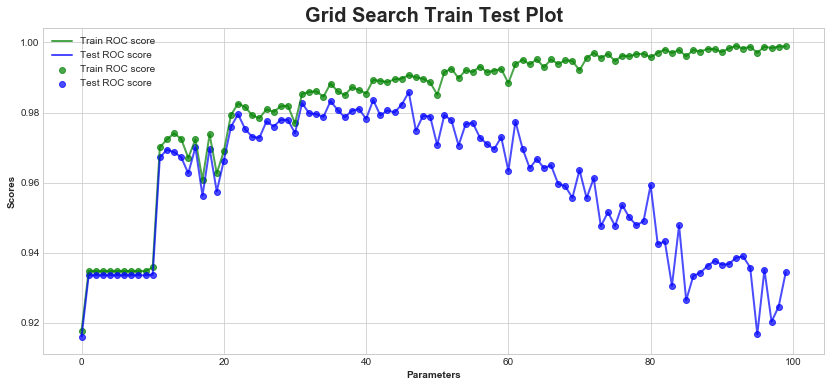

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
identifier,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
identifier_name,"'max_depth': 1, 'max_features': 1","'max_depth': 1, 'max_features': 2","'max_depth': 1, 'max_features': 3","'max_depth': 1, 'max_features': 4","'max_depth': 1, 'max_features': 5","'max_depth': 1, 'max_features': 6","'max_depth': 1, 'max_features': 7","'max_depth': 1, 'max_features': 8","'max_depth': 1, 'max_features': 9","'max_depth': 1, 'max_features': 10",...,"'max_depth': 10, 'max_features': 1","'max_depth': 10, 'max_features': 2","'max_depth': 10, 'max_features': 3","'max_depth': 10, 'max_features': 4","'max_depth': 10, 'max_features': 5","'max_depth': 10, 'max_features': 6","'max_depth': 10, 'max_features': 7","'max_depth': 10, 'max_features': 8","'max_depth': 10, 'max_features': 9","'max_depth': 10, 'max_features': 10"


In [61]:
dtclassresults = pd.DataFrame(dt_grid_search.cv_results_)
dtclassresults['identifier_name'] = dtclassresults.params.apply(lambda x: str(x).replace('{','').replace('}',''))
dtclassresults['identifier'] = (dtclassresults.index)
grid_train_test_plot(dtclassresults,'identifier','mean_train_score','mean_test_score','Grid Search Train Test Plot','Parameters','Scores',14,6,'hide')
dtclassresults[['identifier','identifier_name']].transpose()

In [62]:
dt_accuracy_train = dt_grid_search.best_estimator_.score(X_train, y_train)
dt_accuracy_test = dt_grid_search.best_estimator_.score(X_test, y_test)

print('Decision Tree Classifier - Train Accuracy: %.2f'%dt_accuracy_train)
print('Decision Tree Classifier - Test Accuracy: %.2f '%dt_accuracy_test)

Decision Tree Classifier - Train Accuracy: 0.97
Decision Tree Classifier - Test Accuracy: 0.96 


In [63]:
dt_auc_train = roc_auc_score(y_train,dt_grid_search.predict(X_train))
dt_auc_test = roc_auc_score(y_test,dt_grid_search.predict(X_test))

print('Decision Tree Classifier - Train roc_auc_score: %.2f'%dt_auc_train)
print('Decision Tree Classifier - Test roc_auc_score: %.2f '%dt_auc_test)

Decision Tree Classifier - Train roc_auc_score: 0.95
Decision Tree Classifier - Test roc_auc_score: 0.93 


In [64]:
report_table = report_table + [['Decision Tree Classifier', str(dt_grid_search.best_params_).replace('{','').replace('}','').replace('\'',''), dt_accuracy_train, dt_accuracy_test, dt_auc_train, dt_auc_test]]

In [65]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameters', 'Train Accuracy', 'Test Accuracy', 'Train AUC Score', 'Test AUC Score'])

In [66]:
report.index = report['Model Name']
report.drop(['Model Name'],axis=1,inplace=True)

In [67]:
report

,Model Parameters,Train Accuracy,Test Accuracy,Train AUC Score,Test AUC Score
Model Name,,,,,
K Neighbors Classifier,n_neighbors: 10,0.970149,0.961989,0.939768,0.924188
Logistic Regression,"C: 10, penalty: l1",0.969172,0.966607,0.941443,0.936672
Linear Support Vector Machine Classifier,"C: 1, dual: False, loss: squared_hinge, penalt...",0.967395,0.966607,0.934555,0.933925
Linear Kernelized Support Vector Machine Classifier,C: 100,0.969083,0.966963,0.942966,0.938952
RBF Kernelized Support Vector Machine Classifier,"C: 0.1, gamma: 0.01",0.809879,0.807460,0.506912,0.508167
Poly Kernelized Support Vector Machine Classifier,"C: 10, degree: 2, gamma: 0.01",0.884684,0.879218,0.702149,0.691470
Decision Tree Classifier,"max_depth: 5, max_features: 7",0.970593,0.960924,0.948813,0.931078


In [68]:
report['identifier'] = report.index
report['identifier'] = report.identifier.apply(lambda x: str(x).replace('Classifier','').replace('Support Vector Machine','SVM'))

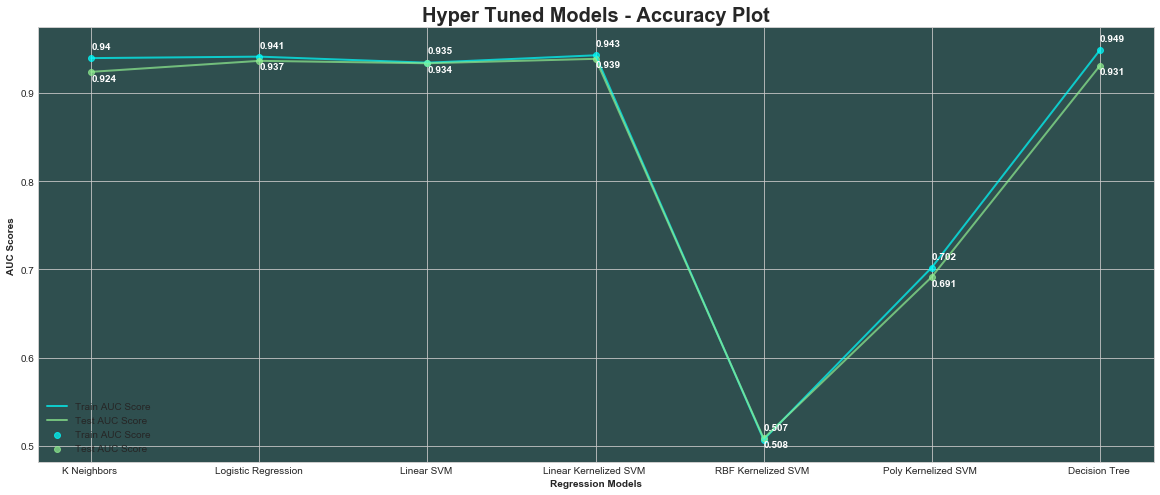

In [69]:
%matplotlib inline
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111,facecolor='darkslategray')
opacity=0.7
ax.plot(report['identifier'], report['Train AUC Score'], c = 'cyan',linewidth=2,alpha=opacity)
ax.plot(report['identifier'], report['Test AUC Score'], c = 'lightgreen',linewidth=2,alpha=opacity)
ax.scatter(report['identifier'], report['Train AUC Score'], c = 'cyan',alpha=opacity)
ax.scatter(report['identifier'], report['Test AUC Score'], c = 'lightgreen',alpha=opacity)
for i,j in zip(report['identifier'],round(report['Train AUC Score'],3)):
    ax.annotate(str(j),xy=(i,j+0.01),color='white',weight='bold')
for i,j in zip(report['identifier'],round(report['Test AUC Score'],3)):
    ax.annotate(str(j),xy=(i,j-0.01),color='white',weight='bold')
ax.legend()
ax.set_title('Hyper Tuned Models - Accuracy Plot',fontsize=20,weight='bold')
ax.set_xlabel('Regression Models',fontsize=10,weight='bold')
ax.set_ylabel('AUC Scores',fontsize=10,weight='bold')
handles, labels = ax.get_legend_handles_labels()
plt.show()

Train and test scores of Logistic Regression Classifier, Linear SVM Classifier, Linear Kernelized SVM Classifier, Decision Tree Classifier are around 94% and 93% respectively.

Linear SVM and Linear Kernelized SVM are computationally intensive. With same accuracy, Logistic regression will be better than Decision Tree in terms of interpretability and robustness.

Logistic Regression not only makes buzz prediction for each topic instances but also generates predicted buzz probability for each topic and hence, considered as best model for this dataset.

## Logistic Regression Classifier - Twitter Buzz Prediction

Fitting logistic regression classifier on the entire dataset.

In [70]:
X_train_final_S, X_test_final_S, y_train_final, y_test_final = train_test_split(X, y, shuffle = True, test_size = 0.2, random_state = 10)

In [71]:
scaler_final = MinMaxScaler()
X_train_final = scaler_final.fit_transform(X_train_final_S)
X_test_final = scaler_final.transform(X_test_final_S)

In [72]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import scikitplot as skplt
def final_metrics(log_final,y_test,y_pred_log):
    log_metrics = {'Accuracy' : metrics.accuracy_score(y_test, y_pred_log),
                     'Precision' : metrics.precision_score(y_test, y_pred_log),
                     'Recall' : metrics.recall_score(y_test, y_pred_log),
                     'F1 Score' : metrics.f1_score(y_test, y_pred_log),
                     'ROC-AUC Score' : metrics.roc_auc_score(y_test, y_pred_log),
                    }
    df_logmetrics = pd.DataFrame.from_dict(log_metrics, orient='index',columns=['Scores'])
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_log,cmap=plt.cm.Blues)
    return df_logmetrics
def plot_roc(model,x_test,y_test):
    model_proba = model.predict_proba(x_test)
    fig = plt.figure()
    ax1 = fig.add_subplot()
    skplt.metrics.plot_roc(y_test,model_proba ,figsize = (15,7),title_fontsize='large',text_fontsize='large')                
    return None

In [73]:
lr = LogisticRegression(C=10, penalty='l1', random_state = 10).fit(X_train_final, y_train_final)

In [74]:
lr_auc_train = roc_auc_score(y_train_final,lr.predict(X_train_final))
lr_auc_test = roc_auc_score(y_test_final,lr.predict(X_test_final))

print('Buzz Prediction - Train roc_auc_score: %f'%lr_auc_train)
print('Buzz Prediction - Test roc_auc_score: %f '%lr_auc_test)

Buzz Prediction - Train roc_auc_score: 0.936195
Buzz Prediction - Test roc_auc_score: 0.938470 


#### Buzz Prediction Report

1 . *Confusion Matrix*

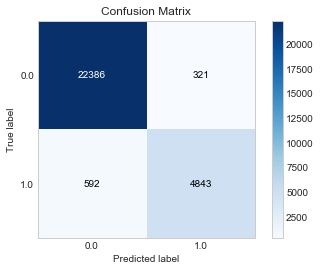

In [80]:
y_pred_final = lr.predict(X_test_final)
df_logmetrics =final_metrics(lr,y_test_final,y_pred_final)

2. *Model Metrics*

In [76]:
df_logmetrics

,Scores
Accuracy,0.967557
Precision,0.937839
Recall,0.891076
F1 Score,0.913860
ROC-AUC Score,0.938470


3. *ROC Plot*

<Figure size 432x288 with 0 Axes>

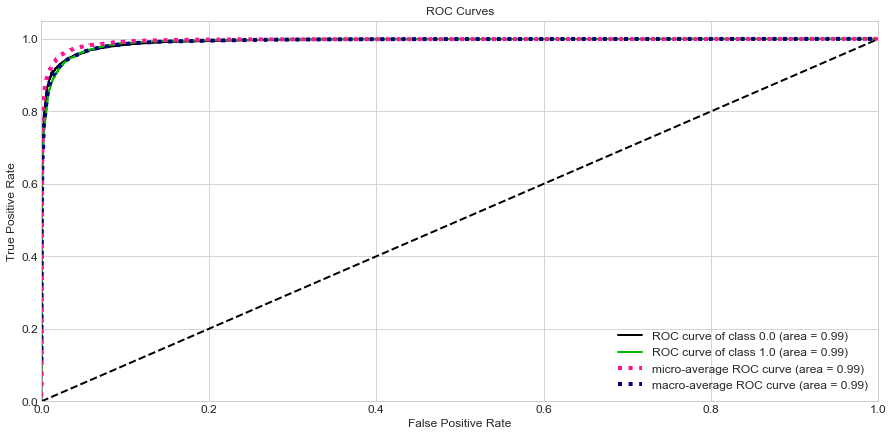

In [77]:
plot_roc(lr,X_test_final,y_test_final)

## Conclusion

*Logistic Regression Classifier will predict whether the future unseen topic is buzz or not with ROC-AUC Score of 94%*